# Configuration

In [1]:
import numpy as np
from datetime import timedelta

from SimCAD import configs
from SimCAD.configuration import Configuration
from SimCAD.configuration.utils import exo_update_per_ts, proc_trigger, ep_time_step

seed = {
}

# Behaviors
def tracker(step, sL, s):
    currentSignal = s['signal']
    currentFollow = s['follow']
    dif = currentSignal - currentFollow
    return {'value': dif}

# Mechanisms
def add(step, sL, s, _input):
    y = 'follow'
    x = s['follow'] + _input['value']
    return (y, x)

# Exogenous States
period = 50
def sinusoid(step, sL, s, _input):
    y = 'signal'
    x = s['elapsed_time'] + t_delta.seconds
    x = np.sin(x * 2 * np.pi / period)
    return (y, x)

def delta_time(step, sL, s, _input):
    y = 'elapsed_time'
    x = s['elapsed_time'] + t_delta.seconds
    return (y, x)

ts_format = '%Y-%m-%d %H:%M:%S'
t_delta = timedelta(days=0, minutes=0, seconds=1)
def time_model(step, sL, s, _input):
    y = 'timestamp'
    x = ep_time_step(s, dt_str=s['timestamp'], fromat_str=ts_format, _timedelta=t_delta)
    return (y, x)

# Genesis States
genesis_states = {
    'signal': float(0),
    'follow': float(0),
    'elapsed_time': float(0),
    'timestamp': '2018-01-01 00:00:00'
}

# remove `exo_update_per_ts` to update every ts
exogenous_states = exo_update_per_ts(
    {
    "signal": sinusoid,
    'elapsed_time': delta_time,
    "timestamp": time_model
    }
)

env_processes = {
}

mechanisms = {
    "add": {
        "behaviors": {
            "tracker": tracker
        },
        "states": { 
            "follow": add
        }
    }
}

sim_config = {
    "N": 1,
    "T": range(50)
}

configs.append(
    Configuration(
        sim_config=sim_config,
        state_dict=genesis_states,
        seed=seed,
        exogenous_states=exogenous_states,
        env_processes=env_processes,
        mechanisms=mechanisms
    )
)

# Run the engine

In [ ]:
from SimCAD.engine import ExecutionMode, ExecutionContext, Executor
# from demos import simple_tracker_config
from SimCAD import configs
exec_mode = ExecutionMode()

single_config = [configs[0]]
single_proc_ctx = ExecutionContext(exec_mode.single_proc)
run = Executor(single_proc_ctx, single_config)
run_raw_result = run.main()[0]

# Analyze the results

single_proc: [<SimCAD.configuration.Configuration object at 0x10fd47fd0>]


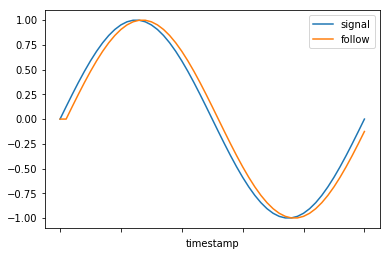

In [2]:
%matplotlib inline
import pandas as pd
from tabulate import tabulate
result = pd.DataFrame(run_raw_result)
result.plot('timestamp', ['signal','follow'])